# Brainstation Capstone Project

Author: Reynaldo Cortez

Date: 2021-11-28

Contact: rejocortez@gmail.com


Description: Code below is an analysis on which statistical characteristics are predictive of an NBA's team success and then using this information to determine which players possess these attributes. The goal is to find which players can help a team win more games, even finding players currently getting paid low salaries. This information is very valuable to team's looking to manage the talent and salary level of their respetive teams. 

Data: 

Datasets were adquired through Kaggle and GitHub.

- Game Data: 
<a href="https://www.kaggle.com/nathanlauga/nba-games">NBA Games</a>

- Salary Information: 
<a href="https://raw.githubusercontent.com/erikgregorywebb/datasets/master/nba-salaries.csv">NBA Salaries</a>

### Loading Libraries

These will be the libraries used throughout the notebook:


In [244]:
#This cell calls all the libraries that are used in this Notebook

# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import operator

pd.options.display.float_format = "{:,.4f}".format

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To build models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To try scale the data in various ways
from sklearn.preprocessing import StandardScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To check accuracy_scores and validate
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

### Loading in Data

Examining the game dataset from Kaggle, I have a .csv file that gives me details of lots of NBA games:

In [124]:
games_df = pd.read_csv('games.csv')
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.00,0.56,0.68,...,26.00,45.00,1610612764,95.00,0.40,0.63,0.09,22.00,40.00,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.00,0.38,0.74,...,15.00,54.00,1610612737,92.00,0.37,0.82,0.27,17.00,41.00,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.00,0.54,0.77,...,28.00,42.00,1610612763,129.00,0.54,0.76,0.35,20.00,33.00,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.00,0.52,0.95,...,31.00,46.00,1610612738,108.00,0.42,0.78,0.35,23.00,43.00,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.00,0.47,0.93,...,21.00,31.00,1610612747,109.00,0.45,0.87,0.30,24.00,39.00,0


I am interested to find all the column names in this dataset:

In [125]:
print(list(games_df.columns))

['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']


Notice that the data is separated between the "home" team and the "away" team.

After a quick inspection, I begin to look at the shape of the dataset:

In [126]:
games_df.shape

(24677, 21)

Find that there are:

- 21 columns
- 24,677 rows

I am interested to find the variable types currently stored:

In [ ]:
games_df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24578 entries, 0 to 24676
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     24578 non-null  object 
 1   GAME_ID           24578 non-null  int64  
 2   GAME_STATUS_TEXT  24578 non-null  object 
 3   HOME_TEAM_ID      24578 non-null  int64  
 4   VISITOR_TEAM_ID   24578 non-null  int64  
 5   SEASON            24578 non-null  int64  
 6   TEAM_ID_home      24578 non-null  int64  
 7   PTS_home          24578 non-null  float64
 8   FG_PCT_home       24578 non-null  float64
 9   FT_PCT_home       24578 non-null  float64
 10  FG3_PCT_home      24578 non-null  float64
 11  AST_home          24578 non-null  float64
 12  REB_home          24578 non-null  float64
 13  TEAM_ID_away      24578 non-null  int64  
 14  PTS_away          24578 non-null  float64
 15  FG_PCT_away       24578 non-null  float64
 16  FT_PCT_away       24578 non-null  float6

Find that the dataset contains: float64(12), int64(7), object(2).

I will convert the date column to a date data type to see the range of information I currently possess.

In [155]:
games_df['GAME_DATE_EST'] = pd.to_datetime(games_df['GAME_DATE_EST']) #first I convert the column "GAME_DATE_SET" to datetime variable
games_df['GAME_DATE_EST'].describe() #use describe to show me the date rage

count                   24578
unique                   3941
top       2020-12-23 00:00:00
freq                       21
first     2003-10-05 00:00:00
last      2021-05-26 00:00:00
Name: GAME_DATE_EST, dtype: object

The dates included in this dataset span from 2003 to 2021.

Proceed to find if there are any duplicated rows:

In [127]:
games_df.duplicated().sum() #sum of all duplicate rows

15

Begin to examine all duplicates:

In [143]:
duplicate_index = games_df.duplicated(keep=False ) #finding all the duplicate rows
duplicates = games_df[duplicate_index] #showing all duplicate data
duplicates.sort_values(["GAME_DATE_EST", 'GAME_ID']) #Showing all paired duplicates 

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
636,2020-12-23,22000004,Final,1610612756,1610612742,2020,1610612756,106.00,0.48,0.70,...,21.00,48.00,1610612742,102.00,0.42,0.81,0.24,17.00,39.00,1
1156,2020-12-23,22000004,Final,1610612756,1610612742,2020,1610612756,106.00,0.48,0.70,...,21.00,48.00,1610612742,102.00,0.42,0.81,0.24,17.00,39.00,1
541,2020-12-23,22000012,Final,1610612753,1610612748,2020,1610612753,113.00,0.48,0.63,...,23.00,41.00,1610612748,107.00,0.51,0.84,0.35,25.00,43.00,1
1152,2020-12-23,22000012,Final,1610612753,1610612748,2020,1610612753,113.00,0.48,0.63,...,23.00,41.00,1610612748,107.00,0.51,0.84,0.35,25.00,43.00,1
537,2020-12-25,22000008,Final,1610612747,1610612742,2020,1610612747,138.00,0.56,0.71,...,33.00,53.00,1610612742,115.00,0.49,0.77,0.41,20.00,27.00,1
1150,2020-12-25,22000008,Final,1610612747,1610612742,2020,1610612747,138.00,0.56,0.71,...,33.00,53.00,1610612742,115.00,0.49,0.77,0.41,20.00,27.00,1
532,2020-12-26,22000029,Final,1610612757,1610612745,2020,1610612757,128.00,0.46,0.65,...,27.00,45.00,1610612745,126.00,0.52,0.78,0.31,27.00,42.00,1
1146,2020-12-26,22000029,Final,1610612757,1610612745,2020,1610612757,128.00,0.46,0.65,...,27.00,45.00,1610612745,126.00,0.52,0.78,0.31,27.00,42.00,1
516,2020-12-27,22000033,Final,1610612764,1610612753,2020,1610612764,113.00,0.48,0.85,...,27.00,47.00,1610612753,120.00,0.43,0.97,0.36,19.00,45.00,0
1138,2020-12-27,22000033,Final,1610612764,1610612753,2020,1610612764,113.00,0.48,0.85,...,27.00,47.00,1610612753,120.00,0.43,0.97,0.36,19.00,45.00,0


As expected we find 30 rows (15 duplicates x 2), I will check the relevance of this data next:

In [144]:
round(games_df.duplicated().sum()/games_df.shape[0]*100,2)

0.06

The duplicated rows account for 0.06% of all the data, I decide to drop these rows as they are not significant to the overall dataset:

In [9]:
games_df.drop_duplicates(inplace=True) #drop all duplicates

Now I begin to check for all null values:

In [146]:
games_df.isna().sum() #getting a sum of all null values found on each column

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

I'll inspect the null values next:

In [149]:
nulls = games_df[games_df.isna().any(axis=1)] #showing all null value rows
nulls.groupby(['GAME_ID']).head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
17201,2003-10-24,10300116,Final,1610612753,1610612762,2003,1610612753,NaN,NaN,NaN,...,NaN,NaN,1610612762,NaN,NaN,NaN,NaN,NaN,NaN,0
17202,2003-10-24,10300108,Final,1610612737,1610612764,2003,1610612737,NaN,NaN,NaN,...,NaN,NaN,1610612764,NaN,NaN,NaN,NaN,NaN,NaN,0
17203,2003-10-24,10300109,Final,1610612738,1610612751,2003,1610612738,NaN,NaN,NaN,...,NaN,NaN,1610612751,NaN,NaN,NaN,NaN,NaN,NaN,0
17204,2003-10-24,10300113,Final,1610612759,1610612745,2003,1610612759,NaN,NaN,NaN,...,NaN,NaN,1610612745,NaN,NaN,NaN,NaN,NaN,NaN,0
17205,2003-10-24,10300112,Final,1610612749,1610612765,2003,1610612749,NaN,NaN,NaN,...,NaN,NaN,1610612765,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17295,2003-10-09,10300019,Final,1610612743,1610612756,2003,1610612743,NaN,NaN,NaN,...,NaN,NaN,1610612756,NaN,NaN,NaN,NaN,NaN,NaN,0
17296,2003-10-09,10300022,Final,1610612757,1610612758,2003,1610612757,NaN,NaN,NaN,...,NaN,NaN,1610612758,NaN,NaN,NaN,NaN,NaN,NaN,0
17297,2003-10-08,10300013,Final,1610612759,1610612763,2003,1610612759,NaN,NaN,NaN,...,NaN,NaN,1610612763,NaN,NaN,NaN,NaN,NaN,NaN,0
17304,2003-10-08,10300015,Final,1610612747,1610612744,2003,1610612747,NaN,NaN,NaN,...,NaN,NaN,1610612744,NaN,NaN,NaN,NaN,NaN,NaN,0


I begin to search what dates are affected by these null values:

In [151]:
nulls['GAME_DATE_EST'] = pd.to_datetime(nulls['GAME_DATE_EST']) #first I convert the column "GAME_DATE_SET" to datetime variable
nulls['GAME_DATE_EST'].describe() #use describe to show me the date rage affected

count                      99
unique                     18
top       2003-10-14 00:00:00
freq                       10
first     2003-10-07 00:00:00
last      2003-10-24 00:00:00
Name: GAME_DATE_EST, dtype: object

I notice all nulls occur in 2003. Since it is not recent data I am leaning to just removing the rows.

I check the significance of all the null values:

In [152]:
games_df.isna().sum()/games_df.shape[0] * 100 #checking the percentage of null values

GAME_DATE_EST      0.00
GAME_ID            0.00
GAME_STATUS_TEXT   0.00
HOME_TEAM_ID       0.00
VISITOR_TEAM_ID    0.00
SEASON             0.00
TEAM_ID_home       0.00
PTS_home           0.40
FG_PCT_home        0.40
FT_PCT_home        0.40
FG3_PCT_home       0.40
AST_home           0.40
REB_home           0.40
TEAM_ID_away       0.00
PTS_away           0.40
FG_PCT_away        0.40
FT_PCT_away        0.40
FG3_PCT_away       0.40
AST_away           0.40
REB_away           0.40
HOME_TEAM_WINS     0.00
dtype: float64

The rows with null values account for 0.4% of all the data, and after checking that only the year 2003 is affected, I decide to drop these rows.

In [153]:
games_df = games_df.dropna(how='any',axis=0) #dropping all null rows

Check if the change went through:

In [15]:
games_df.isna().sum()

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

I have now eliminated all duplicated and null values in my dataset.

### Feature Engineering

Proceed to find more statistical data that I could include in my investigation. From Kaggle I have another .CSV file that contains more details that are not currently found in my games_df dataset.

Proceed to load my next dataset:

In [156]:
games_details_df = pd.read_csv('games_details.csv') #load dataset
games_details_df.head() #quick inspection of the data

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,42000102,1610612764,WAS,Washington,203078,Bradley Beal,F,NaN,34:36,14.00,...,0.00,4.00,4.00,3.00,1.00,0.00,1.00,0.00,33.00,-22.00
1,42000102,1610612764,WAS,Washington,1629060,Rui Hachimura,F,NaN,25:50,4.00,...,2.00,5.00,7.00,1.00,0.00,0.00,3.00,4.00,11.00,-6.00
2,42000102,1610612764,WAS,Washington,203458,Alex Len,C,NaN,12:11,3.00,...,3.00,2.00,5.00,0.00,1.00,0.00,0.00,2.00,6.00,-11.00
3,42000102,1610612764,WAS,Washington,203526,Raul Neto,G,NaN,19:19,2.00,...,1.00,2.00,3.00,1.00,0.00,0.00,0.00,2.00,4.00,-17.00
4,42000102,1610612764,WAS,Washington,201566,Russell Westbrook,G,NaN,29:07,2.00,...,2.00,4.00,6.00,11.00,0.00,0.00,4.00,0.00,10.00,-16.00


I am interested to find all the column names in this dataset:

In [158]:
print(list(games_details_df))

['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']


After a quick inspection, I begin to look at the shape of the dataset:

In [159]:
games_details_df.shape

(615626, 28)

Find that there are:

- 28 columns
- 615,626 rows

I am interested to find the variable types currently stored:

In [160]:
games_details_df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615626 entries, 0 to 615625
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            615626 non-null  int64  
 1   TEAM_ID            615626 non-null  int64  
 2   TEAM_ABBREVIATION  615626 non-null  object 
 3   TEAM_CITY          615626 non-null  object 
 4   PLAYER_ID          615626 non-null  int64  
 5   PLAYER_NAME        615626 non-null  object 
 6   START_POSITION     235795 non-null  object 
 7   COMMENT            100048 non-null  object 
 8   MIN                515577 non-null  object 
 9   FGM                515577 non-null  float64
 10  FGA                515577 non-null  float64
 11  FG_PCT             515577 non-null  float64
 12  FG3M               515577 non-null  float64
 13  FG3A               515577 non-null  float64
 14  FG3_PCT            515577 non-null  float64
 15  FTM                515577 non-null  float64
 16  FT

Find that the dataset contains: float64(19), int64(3), object(6).

I notice that this dataset includes the players' individual stats from my first dataset. Since a lot of information is shared between datasets I choose the following columns to concentrate on:

- GAME_ID: Game ID shared between this dataset and games_df
- TEAM_ID: Team ID shared between this dataset and games_df
- STL: steals not found in games_df
- BLK: blocks not found in games_df
- TO: turnovers not found in games_df

I create a new variable to store the columns I am interested on.

In [161]:
#games_ex_df will hold my columns of interest

games_ex_df = games_details_df.drop(['TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'PF', 'PTS', 'PLUS_MINUS', 'PLAYER_NAME', 'FG_PCT',	'FG3_PCT','FT_PCT', 'REB', 'AST'], 1)

In [162]:
games_ex_df.head(5)

,GAME_ID,TEAM_ID,STL,BLK,TO
0,42000102,1610612764,1.00,0.00,1.00
1,42000102,1610612764,0.00,0.00,3.00
2,42000102,1610612764,1.00,0.00,0.00
3,42000102,1610612764,0.00,0.00,0.00
4,42000102,1610612764,0.00,0.00,4.00


This new dataset has all the steals, blocks and turnovers that each player produced in every game. I want to find the total of these figures per game.

In [163]:
#games_ex_df2 will store the sum of my figures per game per team

games_ex_df2 = games_ex_df.groupby(["GAME_ID", "TEAM_ID"]).sum()

games_ex_df2.head(5)

STL  BLK    TO
GAME_ID  TEAM_ID                    
10300001 1610612742  9.00 4.00 18.00
         1610612762  8.00 4.00 18.00
10300002 1610612749  9.00 4.00 24.00
         1610612763 18.00 7.00 25.00
10300003 1610612739 10.00 7.00 25.00

I noticed that the new dataset is a multi-index dataset:

In [164]:
games_ex_df2.index #checking the index

MultiIndex([(10300001, 1610612742),
            (10300001, 1610612762),
            (10300002, 1610612749),
            (10300002, 1610612763),
            (10300003, 1610612739),
            (10300003, 1610612765),
            (10300004, 1610612742),
            (10300004, 1610612753),
            (10300005, 1610612745),
            (10300005, 1610612757),
            ...
            (52000111, 1610612754),
            (52000111, 1610612766),
            (52000121, 1610612744),
            (52000121, 1610612747),
            (52000131, 1610612759),
            (52000131, 1610612763),
            (52000201, 1610612754),
            (52000201, 1610612764),
            (52000211, 1610612744),
            (52000211, 1610612763)],
           names=['GAME_ID', 'TEAM_ID'], length=49047)

In order to work with this dataset I decide to reset the index so that there is only one index per row:

In [165]:
games_ex_df2.reset_index() #resetting the index

,GAME_ID,TEAM_ID,STL,BLK,TO
0,10300001,1610612742,9.00,4.00,18.00
1,10300001,1610612762,8.00,4.00,18.00
2,10300002,1610612749,9.00,4.00,24.00
3,10300002,1610612763,18.00,7.00,25.00
4,10300003,1610612739,10.00,7.00,25.00
...,...,...,...,...,...
49042,52000131,1610612763,4.00,11.00,9.00
49043,52000201,1610612754,9.00,4.00,14.00
49044,52000201,1610612764,7.00,9.00,15.00
49045,52000211,1610612744,7.00,7.00,21.00


I will be adding these new information to games_df so I create empty columns to store these values:

In [166]:
games_df.head(5) #as reminder this is what games_df looks like

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.00,0.56,0.68,...,26.00,45.00,1610612764,95.00,0.40,0.63,0.09,22.00,40.00,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.00,0.38,0.74,...,15.00,54.00,1610612737,92.00,0.37,0.82,0.27,17.00,41.00,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.00,0.54,0.77,...,28.00,42.00,1610612763,129.00,0.54,0.76,0.35,20.00,33.00,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.00,0.52,0.95,...,31.00,46.00,1610612738,108.00,0.42,0.78,0.35,23.00,43.00,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.00,0.47,0.93,...,21.00,31.00,1610612747,109.00,0.45,0.87,0.30,24.00,39.00,0


Proceed to add the missing columns:

In [167]:
games_df["STL_home"] = ""
games_df["STL_away"] = ""
games_df["BLK_home"] = ""
games_df["BLK_away"] = ""
games_df["TO_home"] = ""
games_df["TO_away"] = ""

I check that the change took place:

In [34]:
print(list(games_df.columns))

['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS', 'STL_home', 'STL_away', 'BLK_home', 'BLK_away', 'TO_home', 'TO_away']


The columns were successfully added, I begin to fill them with values:

### Please note
The cell below takes lots of time to run, thus i decided to leave it commented it out. I have run this cell before and decided to store the results in a separate .csv file.

In [168]:
#Code below was to write Steals, Blocks and Turnovers to the game data.
#Because this code takes a lot of time to run

# for i in range(0, len(games_df)):
    
#     for j in range (0, len(games_ex_df2)):
        
#         if games_df['GAME_ID'].iloc[i] == games_ex_df2['GAME_ID'].iloc[j]:
            
#             if games_df['HOME_TEAM_ID'].iloc[i] == games_ex_df2['TEAM_ID'].iloc[j]:

#                 games_df.iloc[i, games_df.columns.get_loc('STL_home')] = games_ex_df2['STL'].iloc[j]
#                 games_df.iloc[i, games_df.columns.get_loc('BLK_home')] = games_ex_df2['BLK'].iloc[j]
#                 games_df.iloc[i, games_df.columns.get_loc('TO_home')] = games_ex_df2['TO'].iloc[j]
            
#             if games_df['VISITOR_TEAM_ID'].iloc[i] == games_ex_df2['TEAM_ID'].iloc[j]:

#                 games_df.iloc[i, games_df.columns.get_loc('STL_away')] = games_ex_df2['STL'].iloc[j]
#                 games_df.iloc[i, games_df.columns.get_loc('BLK_away')] = games_ex_df2['BLK'].iloc[j]
#                 games_df.iloc[i, games_df.columns.get_loc('TO_away')] = games_ex_df2['TO'].iloc[j]

# games_df.to_csv('games_ext.csv')

In [169]:
#games_df is filled with a csv created above, since the for loop below takes time to load, I'm using the created CSV.

games_df = pd.read_csv('games_ext.csv')

Check my new dataset:

In [170]:
games_df.isna().sum() #check for nulls

Unnamed: 0          0
GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
STL_home            0
STL_away            0
BLK_home            0
BLK_away            0
TO_home             0
TO_away             0
dtype: int64

No nulls, the for loop was a success.

Here's what the new dataset looks like:

In [37]:
games_df.head(5)

,Unnamed: 0,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,STL_home,STL_away,BLK_home,BLK_away,TO_home,TO_away
0,0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.00,0.56,...,0.09,22.00,40.00,1,10.00,3.00,14.00,2.00,11.00,13.00
1,1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.00,0.38,...,0.27,17.00,41.00,1,8.00,5.00,2.00,12.00,10.00,13.00
2,2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.00,0.54,...,0.35,20.00,33.00,1,2.00,6.00,4.00,4.00,12.00,11.00
3,3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.00,0.52,...,0.35,23.00,43.00,1,7.00,10.00,7.00,4.00,14.00,15.00
4,4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.00,0.47,...,0.30,24.00,39.00,0,4.00,9.00,3.00,6.00,13.00,7.00


## Modeling

Now that I have a clean dataset with all the features I am interest on, I begin to prepare my data for modeling. I am interested in what categories predict winning.

In [171]:
#X will contain all my independent variables

X = games_df[['FG_PCT_home', 'FT_PCT_home', 
                'FG3_PCT_home', 'AST_home', 'REB_home', 
                'FG_PCT_away', 'FT_PCT_away', 
                'FG3_PCT_away', 'AST_away', 'REB_away',
                'STL_home', 'STL_away', 'BLK_home', 
                'BLK_away', 'TO_home', 'TO_away']]

#y will contain all my dependant variables.

y = games_df[['HOME_TEAM_WINS']]

Let's look at the X values:

In [40]:
X.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,STL_home,STL_away,BLK_home,BLK_away,TO_home,TO_away
0,0.56,0.68,0.43,26.00,45.00,0.40,0.63,0.09,22.00,40.00,10.00,3.00,14.00,2.00,11.00,13.00
1,0.38,0.74,0.36,15.00,54.00,0.37,0.82,0.27,17.00,41.00,8.00,5.00,2.00,12.00,10.00,13.00
2,0.54,0.77,0.49,28.00,42.00,0.54,0.76,0.35,20.00,33.00,2.00,6.00,4.00,4.00,12.00,11.00
3,0.52,0.95,0.45,31.00,46.00,0.42,0.78,0.35,23.00,43.00,7.00,10.00,7.00,4.00,14.00,15.00
4,0.47,0.93,0.31,21.00,31.00,0.45,0.87,0.30,24.00,39.00,4.00,9.00,3.00,6.00,13.00,7.00


Let's look at the y values:

In [41]:
y.head()

,HOME_TEAM_WINS
0,1
1,1
2,1
3,1
4,0


y values meaning:

- 1 means that the home team won
- 0 means that the away team won

I want to check how my dependant variable is currently distributed:

In [179]:
#Checking the probability density of the home team winning vs the away team

fig = px.histogram(y, x="HOME_TEAM_WINS", labels={
                     'HOME_TEAM_WINS': "Wins Distribution"
                 }, title="Distribution of Wins: Home vs Away Teams", histnorm='probability density')

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [-0.5, 0, 0.5, 1, 1.5],
        ticktext = ['', 'Away Team', '', 'Home Team', '']
    )
)

fig.show()

I find out that approximately 60% of time the home team wins, and 40% of the time the away team wins.

To be expected as players tend to play better in their home court than while travelling to other team's arenas.

To begin modeling I separate my data set set into a remainder and test set, remainder to build the model and test to test the accuracy:

In [180]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 17194 data points.
The test set has 7369 data points.


Now that I have separated my datasets I will scale my all the features in my independent variable sets so they are in the same standing. I need to do scaling so that one significant number doesn’t impact the model just because of their large magnitude.

In [185]:
scaler_rem = StandardScaler()
scaler_rem.fit(X_rem)

X_rem = scaler_rem.transform(X_rem)
X_test = scaler_rem.transform(X_test)

Now that I have divided my data and have scaled it, I begin to plug into a logistic regression model, using the logistic model as my base model. I will judge all models against this model:

In [186]:
baseline_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)

# Print the accuracies
print(f'Accuracy on remainder set: {round(baseline_logreg.score(X_rem, y_rem)*100,2)}%')
print(f'Accuracy on test set: {round(baseline_logreg.score(X_test, y_test) * 100, 2)}%')

Accuracy on remainder set: 91.21%
Accuracy on test set: 91.27%


### Base model

This model gave me a very successful accuracy score of 91.27% on my test set.

To improve my models going forward I will scale my independent variables sets to 

To avoid leakage I split my data one more time so I can test my model against unseen data.

In [187]:
# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size = 0.1, test_size=0.01, random_state=1, stratify=y_rem)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_val)} data points.')

The train set has 1719 data points.
The validation set has 172 data points.


I want to make sure I keep all the sets I've created within the same distribution:

In [188]:
print('Proportions in original data:')
print(y.value_counts()/len(y), '\n')

print('Proportions in remainder set:')
print(y_rem.value_counts()/len(y_rem), '\n')

print('Proportions in test set:')
print(y_test.value_counts()/len(y_test), '\n')

print('Proportions in train set:')
print(y_train.value_counts()/len(y_train), '\n')

print('Proportions in validation set:')
print(y_val.value_counts()/len(y_val), '\n')

Proportions in original data:
HOME_TEAM_WINS
1                0.59
0                0.41
dtype: float64 

Proportions in remainder set:
HOME_TEAM_WINS
1                0.59
0                0.41
dtype: float64 

Proportions in test set:
HOME_TEAM_WINS
1                0.59
0                0.41
dtype: float64 

Proportions in train set:
HOME_TEAM_WINS
1                0.59
0                0.41
dtype: float64 

Proportions in validation set:
HOME_TEAM_WINS
1                0.59
0                0.41
dtype: float64 



I've maintained the distribution across all data sets.

To start improving my model I first begin by deciding which "c" value should be used in my logistic regression model:

In [189]:
# Let's try a modest range of C values
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Set up empty lists
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for value in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=value, random_state=1).fit(X_train, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_val, y_val))

In [192]:
pd.DataFrame({'C value': c_values, 'train accuracy': train_accuracies, 'validation accuracy': validation_accuracies, 'Train minus Val': map(operator.sub, train_accuracies, validation_accuracies)})

,C value,train accuracy,validation accuracy,Train minus Val
0,0.0000,0.5916,0.5930,-0.0014
1,0.0001,0.5916,0.5930,-0.0014
2,0.0010,0.8371,0.8198,0.0173
3,0.1000,0.9110,0.9186,-0.0076
4,1.0000,0.9110,0.9128,-0.0018
5,10.0000,0.9116,0.9070,0.0046
6,100.0000,0.9122,0.9070,0.0052
7,"1,000.0000",0.9122,0.9070,0.0052
8,"10,000.0000",0.9122,0.9070,0.0052


From inspecting this table I am able to tell that my score could increase if I use a C value of 10, I graph this so it is evident:

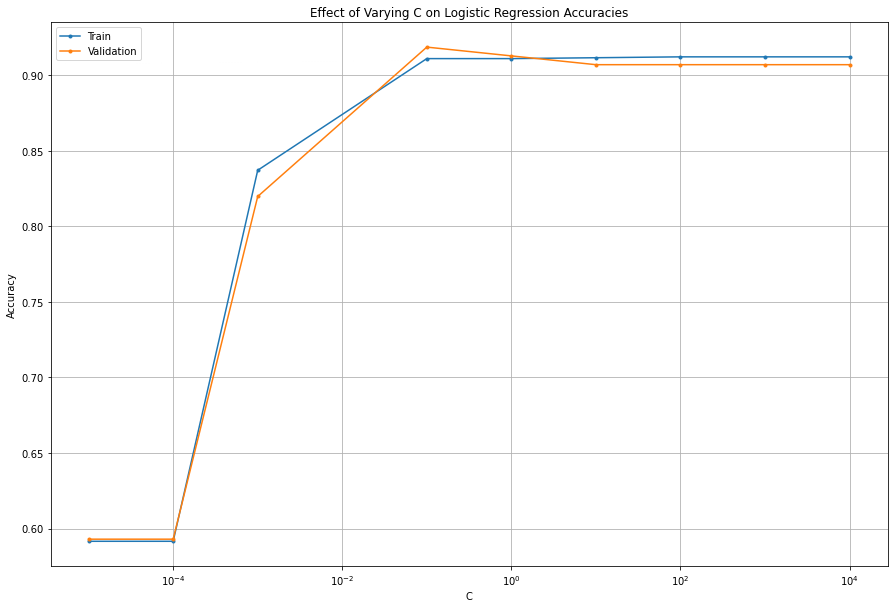

In [193]:
# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.plot(c_values, train_accuracies, label='Train', marker='.')
plt.plot(c_values, validation_accuracies, label='Validation', marker='.')
plt.legend()
plt.title('Effect of Varying C on Logistic Regression Accuracies')
plt.xscale('log') # Put the x-axis on a log scale; this is important because the C values vary in orders of magnitude
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [202]:
validated_logreg = LogisticRegression(C=10**1, random_state=1).fit(X_rem, y_rem)

# Print the accuracies
print(f'Accuracy on remainder set: {round(validated_logreg.score(X_rem, y_rem)*100,2)}%')
print(f'Accuracy on test set: {round(validated_logreg.score(X_test, y_test)*100,2)}%')

Accuracy on remainder set: 91.21%
Accuracy on test set: 91.29%


My accuracy has increased but not significantly. I will take the improvement going forward.

Now that I am happy with my logistic regression model I will see check which features are the most significant to determine wins:

In [206]:
# Storing my validated logistic regression coefficient score in log_odds

log_odds = validated_logreg.coef_[0]

# Create a dataframe that will contain my coefficients and feature names

Coefs = pd.DataFrame(log_odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

Coefs

,coef
FG_PCT_home,2.6231
TO_away,2.1089
REB_home,1.7201
FG3_PCT_home,0.9649
FT_PCT_home,0.6861
AST_home,0.1345
BLK_home,0.1115
STL_home,0.0979
BLK_away,-0.0838
STL_away,-0.1411


## Takeaway

I now can now confirm based on my model that the top 5 categories that determine wins are:

1) Field Goal Percentage
2) Turn-Overs
3) Rebounds
4) Three-point field goal percentage
5) Free-Throw Percentage

While I am satisfied with these results, I want to make sure that any other model won't out perform the validated logistic regression model.

### Testing with KNN Model

In [209]:
# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_rem, y_rem)

train_predictions = KNN_model.predict(X_rem) # knn will compare each test point with all the training data points
train_accuracy = accuracy_score(train_predictions, y_rem)

print(f"Remainder set accuracy: {round(train_accuracy*100,2)}%")
print(f"Test set accuracy: {round(KNN_model.score(X_test, y_test)*100,2)}%")

Remainder set accuracy: 90.53%
Test set accuracy: 85.62%


Found my test set accuracy to be 85.62%. I will now try to optimize it.

In [210]:
#create a range depending on the number of rows in our train dataset

neighbors = range(1, X_train.shape[0], 2)  

#creating list to append score values

train_acc = []
test_acc = []

for n in neighbors: 
        
    #Instantiate the model & fit it to our data
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train, y_train)
    
    #Find the model's prediction of X_train and X_val
    train_predictions = KNN_model.predict(X_train)
    test_predictions = KNN_model.predict(X_val)
    
    #Find the accuracies of train and val set
    train_accuracy = accuracy_score(train_predictions, y_train)
    test_accuracy = accuracy_score(test_predictions, y_val)
    
    #append accuracies to empty lists
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

After storing the train and set accuracies I will plot them for ease of inspection:

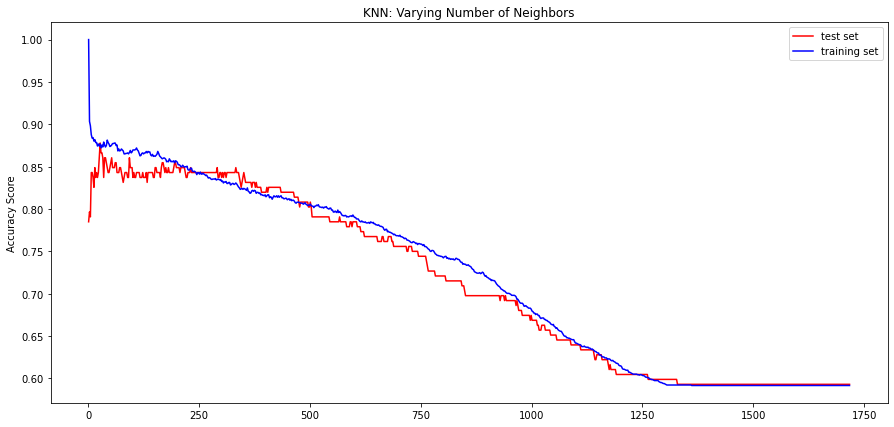

In [211]:
plt.figure(figsize=(15, 7)) #changing figure size for better viewing
plt.plot(neighbors, test_acc, color="red", label="test set") #test accuracy in red line
plt.plot(neighbors, train_acc, color="blue", label="training set") #train accuracy in blue line
plt.ylabel("Accuracy Score")
plt.title('KNN: Varying Number of Neighbors')
plt.legend()
plt.show()

I will now find the best k value:

In [212]:
#index the value that is largest in the test accuracy
index_of_max = np.argmax(test_acc)

#the corresponding best k value
best_k = neighbors[index_of_max]

best_k

27

The best k value is 27.

In [218]:
KNN_model = KNeighborsClassifier(n_neighbors=27).fit(X_rem, y_rem)

print(f"Remainder set accuracy: {round(KNN_model.score(X_rem, y_rem)*100,2)}%")
print(f"Test set accuracy: {round(KNN_model.score(X_test, y_test)*100,2)}%")

Remainder set accuracy: 89.1%
Test set accuracy: 88.56%


I have improved the KNN model test accuracy to 88.56%. The validated logistic model is still performing better.

### Testing with Decision Trees Model

In [219]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_rem, y_rem)
print(f'Remainder set accuracy: {round(DT_model.score(X_rem, y_rem)*100,2)}%')
print(f'Test set accuracy: {round(DT_model.score(X_test, y_test)*100,2)}%')

Remainder set accuracy: 100.0%
Test set accuracy: 79.6%


Decision Tree model produced a test accuracy of 79.6%. I will try to optimize it:

In [220]:
#create empty list to store different accuracies

train_accs = []
test_accs = []
depth_values = list(range(1,15))

# Loop over different max_depths
for d in depth_values:
    
    # Instantiate & fit
    my_dt = DecisionTreeClassifier(max_depth = d)
    my_dt.fit(X_train, y_train)
    
    # Evaluate on train & test data
    train_accs.append( my_dt.score(X_train, y_train) )
    test_accs.append( my_dt.score(X_val, y_val) )

After storing the train and set accuracies I will plot them for ease of inspection:

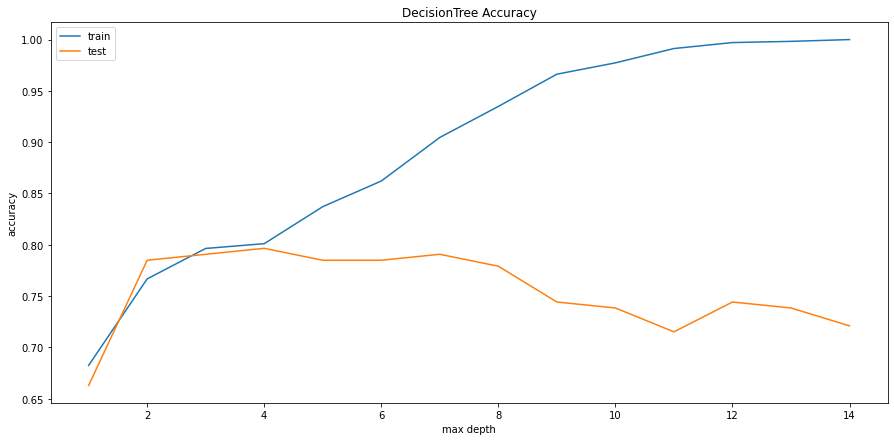

In [221]:
plt.figure(figsize=(15, 7))
plt.plot(depth_values, train_accs, label='train') #train accuracy in blue
plt.plot(depth_values, test_accs, label='test') #test accuracy in orange
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy')
plt.show()

Based on this graph we can tell the bet max_depth for the decision tree model is: 4.

In [223]:
DT_model = DecisionTreeClassifier(max_depth = 4).fit(X_rem, y_rem)

print(f'Remainder set accuracy: {round(DT_model.score(X_rem, y_rem)*100,2)}%')
print(f'Test set accuracy: {round(DT_model.score(X_test, y_test)*100,2)}%')

Remainder set accuracy: 79.28%
Test set accuracy: 78.69%


I have optimized the decision tree model test accuracy to 78.69%. The validated logistic model is still performing better.

## Conclusion

I will proceed with the validated logistic regression model as my standard of what determines winning.

## Clustering

Now that I have a good model that predicts wins, I will now use the findings to better describe the player cluster created through machine language.

Creating a data frame to stores the desired player stats:

In [247]:
#gd_df will store my player stats
gd_df = games_details_df.drop(['TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'PF', 'PTS', 'PLUS_MINUS'], 1)

In [248]:
gd_df = gd_df.dropna(how='any',axis=0) #dropping any null rows
gd_df.head()

,GAME_ID,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO
0,42000102,Bradley Beal,0.5000,0.1670,0.6670,4.0000,3.0000,1.0000,0.0000,1.0000
1,42000102,Rui Hachimura,0.6670,1.0000,0.6670,7.0000,1.0000,0.0000,0.0000,3.0000
2,42000102,Alex Len,0.6000,0.0000,0.0000,5.0000,0.0000,1.0000,0.0000,0.0000
3,42000102,Raul Neto,0.4000,0.0000,0.0000,3.0000,1.0000,0.0000,0.0000,0.0000
4,42000102,Russell Westbrook,0.2000,0.0000,0.6000,6.0000,11.0000,0.0000,0.0000,4.0000


This data has all the statistical features per player per game, to better use this dataset I need to know when the games were played.

The games_df data frame holds the GAME_ID values as well as the GAME_DATE_EST:

In [249]:
games_df[['GAME_DATE_EST','GAME_ID']]

,GAME_DATE_EST,GAME_ID
0,2021-05-26,42000102
1,2021-05-26,42000132
2,2021-05-26,42000142
3,2021-05-25,42000112
4,2021-05-25,42000152
...,...,...
24558,2014-10-06,11400007
24559,2014-10-06,11400004
24560,2014-10-06,11400005
24561,2014-10-05,11400002


I will join these two columns from the games_df set to gd_df:

In [250]:
gd_df = pd.merge(gd_df, games_df[["GAME_DATE_EST", "GAME_ID"]], on ="GAME_ID", how="left") #merging these two datasets together using GAME_ID is the value in common

Let's check if this change took place:

In [251]:
gd_df.head()

,GAME_ID,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,GAME_DATE_EST
0,42000102,Bradley Beal,0.5000,0.1670,0.6670,4.0000,3.0000,1.0000,0.0000,1.0000,2021-05-26
1,42000102,Rui Hachimura,0.6670,1.0000,0.6670,7.0000,1.0000,0.0000,0.0000,3.0000,2021-05-26
2,42000102,Alex Len,0.6000,0.0000,0.0000,5.0000,0.0000,1.0000,0.0000,0.0000,2021-05-26
3,42000102,Raul Neto,0.4000,0.0000,0.0000,3.0000,1.0000,0.0000,0.0000,0.0000,2021-05-26
4,42000102,Russell Westbrook,0.2000,0.0000,0.6000,6.0000,11.0000,0.0000,0.0000,4.0000,2021-05-26


I will make sure the date range is intact:

In [252]:
gd_df['GAME_DATE_EST'] = gd_df['GAME_DATE_EST'].astype('datetime64[ns]')
gd_df['GAME_DATE_EST'].describe()

count                  516611
unique                   3941
top       2020-12-23 00:00:00
freq                      478
first     2003-10-05 00:00:00
last      2021-05-26 00:00:00
Name: GAME_DATE_EST, dtype: object

The dataset is from 2003 to 2021 like the original.

### Cluster Decision

While I could cluster all available players, I want to pick an appropriate date range as I am interested in current players. I decide that I want to cluster players based on the last three available seasons of the NBA.

I find out that the third to last NBA season in this dataset is the 2018–19 NBA season. This season began on Tuesday, October 16 2018. I will create a mask to inspect the last three years:

In [253]:
mask = (gd_df['GAME_DATE_EST'] >= '2018-10-16') # creating a mask with all dates after 2018-10-16

PStat_18_to_21 = gd_df.loc[mask] # storing the players that played the last three seasons in new dataframe

PStat_18_to_21 #displaying results

,GAME_ID,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,GAME_DATE_EST
0,42000102,Bradley Beal,0.5000,0.1670,0.6670,4.0000,3.0000,1.0000,0.0000,1.0000,2021-05-26
1,42000102,Rui Hachimura,0.6670,1.0000,0.6670,7.0000,1.0000,0.0000,0.0000,3.0000,2021-05-26
2,42000102,Alex Len,0.6000,0.0000,0.0000,5.0000,0.0000,1.0000,0.0000,0.0000,2021-05-26
3,42000102,Raul Neto,0.4000,0.0000,0.0000,3.0000,1.0000,0.0000,0.0000,0.0000,2021-05-26
4,42000102,Russell Westbrook,0.2000,0.0000,0.6000,6.0000,11.0000,0.0000,0.0000,4.0000,2021-05-26
...,...,...,...,...,...,...,...,...,...,...,...
333275,21800002,Quinn Cook,0.5000,1.0000,0.0000,2.0000,1.0000,0.0000,0.0000,2.0000,2018-10-16
333276,21800002,Shaun Livingston,0.6000,0.0000,0.0000,3.0000,1.0000,1.0000,0.0000,1.0000,2018-10-16
333277,21800002,Jordan Bell,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,1.0000,0.0000,2018-10-16
333278,21800002,Alfonzo McKinnie,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2018-10-16


Now that I have accounted for all the games that played in the last three seasons I can drop the 'GAME_DATE_EST' and 'GAME_ID' columns:

In [254]:
PStat_18_to_21.drop(['GAME_DATE_EST', 'GAME_ID'], axis=1, inplace=True) # dropping said columns

I will now use the last three years of games and group based on the player name and find the average for all the games in three seasons:

In [255]:
grouped_df = PStat_18_to_21.groupby("PLAYER_NAME") #grouping by player name

mean_df = grouped_df.mean() #finding the average stats per player in 3 seasons

mean_df = mean_df.reset_index() #resetting the index

Now inspect the mean_df dataset:

In [256]:
mean_df

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO
0,Aaron Gordon,0.4404,0.3116,0.5783,6.9234,3.4689,0.7464,0.6411,1.8469
1,Aaron Holiday,0.3910,0.3354,0.3433,1.6733,2.3465,0.6733,0.2228,1.0941
2,Aaron Nesmith,0.3661,0.2872,0.2196,2.8269,0.4615,0.3462,0.2115,0.5962
3,Abdel Nader,0.4033,0.2823,0.2993,1.9542,0.5294,0.3595,0.3007,0.6340
4,Abdul Gaddy,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
814,Zeke Nnaji,0.3633,0.2597,0.1215,1.4167,0.2292,0.1875,0.1250,0.1458
815,Zhaire Smith,0.2994,0.2596,0.2500,1.2105,0.6842,0.4211,0.2105,0.6316
816,Zhou Qi,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
817,Zion Williamson,0.6172,0.1263,0.6640,7.0101,2.9697,0.9596,0.5253,2.6061


It is finally time to start clustering. To do so I have to find the optimal number of groups to cluster the players into.

I will find out the Inertia and Silhouette scores of KMeans cluster using different cluster numbers and then decide the best value to use.

The k-means algorithm is designed to cluster data by minimizing the sum of within-cluster variances, also known as inertia. However, you may want to use the silhouette coefficients to evaluate the clustering performance.

### Inertia Score:

Begin by first using only the numerical values of the player stats (removing the name column):

In [346]:
good_col = mean_df._get_numeric_data() 

In [347]:
k_range = np.arange(1, 20) #testing cluster range from one to 19

# Instantiate an empty list of inertias
inertia_list = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(good_col)
    
    # Get inertia and add to list
    inertia_list.append(k_means_model.inertia_)


Now that I have stored the Inertia values I will now plot them:

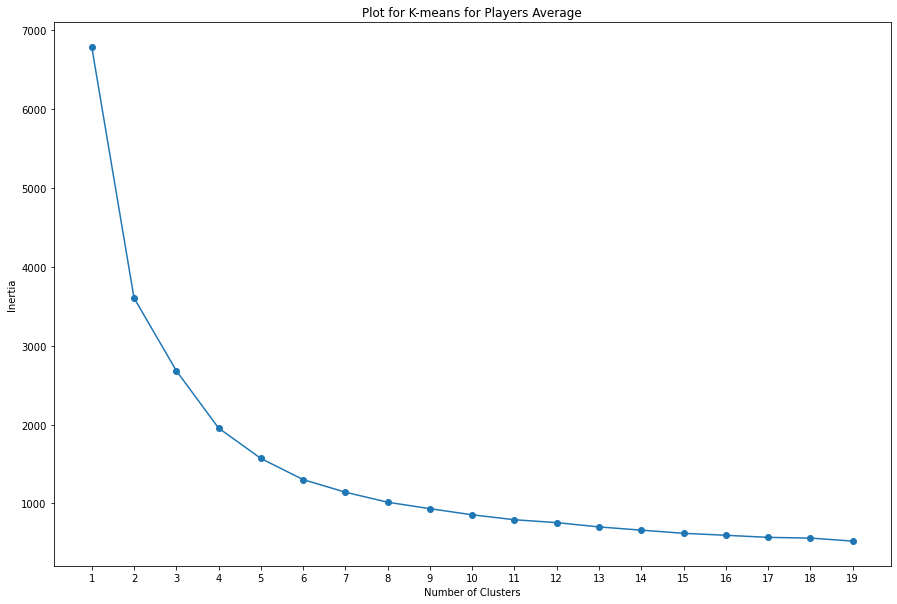

In [348]:
plt.figure(figsize=(15, 10))
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Plot for K-means for Players Average')
plt.xticks(k_range)
plt.show();

### Silhouette Score:

In [349]:
k_range = np.arange(2, 20) #testing a range of 2 to 19

# Instantiate an empty list of silhouette scores
silhouette_scores = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(good_col)
    
    # Get cluster labels and calculate silhouette score
    cluster_labels = k_means_model.predict(good_col)
    silhouette = silhouette_score(good_col, cluster_labels)
    
    # Append to list
    silhouette_scores.append(silhouette)

Now that I have my Silhouette scores stored I will now graph them:

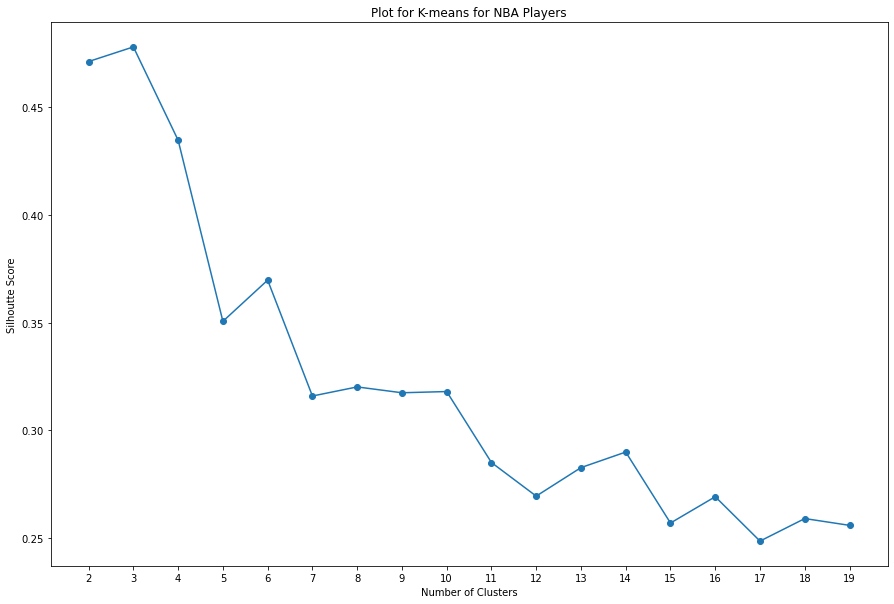

In [350]:
# plot the inertia values 
plt.figure(figsize=(15, 10))
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Plot for K-means for NBA Players')
plt.xticks(k_range)
plt.show();

From the Inertia and Silhouette scores help me determine that:

- With Inertia: The Elbow is represented with 6 number of clusters
- With Silhouette: The score is best performing between 5-7

I chose 6 because it gave me very clear distinctions for the players later on.

In [352]:
Kmeans_model = KMeans(n_clusters=6, random_state=1) #cluster players in groups of 6

Kmeans_model.fit(good_col) #fitting the model on the player data

labels = Kmeans_model.labels_ #storing the cluster labels for each player

labels #displaying the labels

array([5, 0, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 3, 5, 5, 4, 4, 0, 5, 3, 3, 3,
       3, 0, 4, 4, 4, 3, 3, 1, 0, 4, 3, 3, 4, 5, 4, 4, 5, 1, 5, 4, 3, 3,
       4, 4, 3, 4, 3, 5, 4, 0, 0, 4, 4, 1, 4, 2, 4, 4, 5, 2, 3, 5, 0, 5,
       4, 3, 0, 2, 5, 4, 2, 0, 4, 4, 4, 4, 5, 3, 3, 3, 4, 3, 5, 4, 4, 0,
       4, 3, 3, 3, 3, 3, 5, 0, 4, 2, 5, 4, 4, 4, 0, 3, 3, 4, 4, 5, 4, 0,
       3, 3, 5, 0, 4, 2, 3, 4, 5, 3, 1, 0, 3, 5, 2, 0, 3, 0, 4, 3, 2, 0,
       3, 4, 4, 4, 4, 3, 2, 3, 3, 3, 3, 4, 5, 5, 3, 3, 0, 3, 5, 5, 0, 0,
       2, 4, 4, 3, 0, 3, 4, 2, 5, 0, 1, 0, 2, 5, 3, 4, 3, 1, 3, 4, 2, 0,
       0, 4, 5, 2, 0, 3, 4, 5, 3, 0, 4, 0, 3, 2, 4, 0, 3, 3, 4, 4, 3, 2,
       4, 3, 5, 3, 4, 0, 0, 3, 1, 4, 2, 3, 5, 4, 5, 3, 3, 2, 3, 3, 4, 3,
       4, 5, 5, 2, 3, 4, 3, 5, 4, 4, 2, 0, 5, 4, 3, 0, 1, 2, 0, 5, 3, 3,
       3, 0, 0, 0, 4, 3, 0, 0, 2, 3, 3, 4, 3, 3, 4, 3, 0, 3, 4, 0, 4, 4,
       3, 1, 3, 3, 2, 5, 3, 4, 3, 3, 3, 4, 4, 3, 5, 3, 1, 4, 3, 4, 5, 3,
       4, 3, 0, 3, 4, 0, 0, 0, 3, 3, 4, 4, 4, 5, 5,

To better show these cluster, I create a data frame that will contain the cluster labels and also reduce my number of features using PCA to two axis. This is to be able to display the clusters as a 2D representation.

In [353]:
pca_2 = PCA(2) #creating instance of PCA reducing to 2 axis
plot_columns = pca_2.fit_transform(good_col) #fit the numerical column data the PCA

plot_df = pd.DataFrame(data=plot_columns, columns=["x", "y"]) #create plot_df to store values of PCA, naming columns x, and y
plot_df['Cluster Group'] = labels.tolist() #adding a third column to plot_df to store cluster values

plot_df = plot_df.sort_values('Cluster Group', ascending=True) #sorting plot_df based on the label values
plot_df['Cluster Group'] = plot_df['Cluster Group'].apply(str) # converting labels to string so that it has a distinct color when using plotly

In [354]:
# plotting cluster groups

fig = px.scatter(plot_df, x='x', y='y', color="Cluster Group",labels={
                     'x': "",
                     'y': ""
                 }, title="NBA Players as Clusters")
fig.show()

To make sure the clusters are accurately classifying players, I chose two players who most people believe are top players in the game right now: LeBron James and Kevin Durant.

In [355]:
LeBron = good_col.loc[mean_df['PLAYER_NAME'] == 'LeBron James', :] #finding data row that belongs to Lebron
Durant = good_col.loc[mean_df['PLAYER_NAME'] == 'Kevin Durant', :] #finding data row that belongs to Durant

#displaying data rows:

print(LeBron)
print(Durant)

     FG_PCT  FG3_PCT  FT_PCT    REB    AST    STL    BLK     TO
502  0.5063   0.3271  0.6778 8.0846 8.7413 1.1841 0.5672 3.7164
     FG_PCT  FG3_PCT  FT_PCT    REB    AST    STL    BLK     TO
465  0.5455   0.4161  0.8636 6.5036 5.5396 0.7914 1.1727 3.1367


Now let's see which cluster these players belong to:

In [357]:
Lebron_list = LeBron.values.tolist()
durant_list = Durant.values.tolist()

Lebron_cluster = Kmeans_model.predict(Lebron_list) # getting Kmeans model to predict label of Lebron
durant_cluster = Kmeans_model.predict(durant_list) # getting Kmeans model to predict label of Durant

# printing predictive labels:

print(Lebron_cluster)
print(durant_cluster)

[2]
[2]


It has categorized these players, and they belong in the same cluster. Now that we feel confident about the clusters, I begin to take a closer look at these clusters.

I begin by first creating a new data frame that stores my cluster label, along with player name and stats.

In [360]:
Cluster = Kmeans_model.predict(good_col.loc[:,:])

cluster_df = pd.DataFrame({'Cluster Type': Cluster}) # creating a dataframe to store cluster labels

cluster_df #displaying results

,Cluster Type
0,5
1,0
2,3
3,4
4,4
...,...
814,4
815,4
816,4
817,5


Now I merge this cluster label data frame with the data frame storing the players' names and stats:

In [361]:
Player_Cluster = pd.merge(mean_df, cluster_df, left_index=True, right_index=True, how='left') #merging tables
Player_Cluster #displaying

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type
0,Aaron Gordon,0.4404,0.3116,0.5783,6.9234,3.4689,0.7464,0.6411,1.8469,5
1,Aaron Holiday,0.3910,0.3354,0.3433,1.6733,2.3465,0.6733,0.2228,1.0941,0
2,Aaron Nesmith,0.3661,0.2872,0.2196,2.8269,0.4615,0.3462,0.2115,0.5962,3
3,Abdel Nader,0.4033,0.2823,0.2993,1.9542,0.5294,0.3595,0.3007,0.6340,4
4,Abdul Gaddy,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4
...,...,...,...,...,...,...,...,...,...,...
814,Zeke Nnaji,0.3633,0.2597,0.1215,1.4167,0.2292,0.1875,0.1250,0.1458,4
815,Zhaire Smith,0.2994,0.2596,0.2500,1.2105,0.6842,0.4211,0.2105,0.6316,4
816,Zhou Qi,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4
817,Zion Williamson,0.6172,0.1263,0.6640,7.0101,2.9697,0.9596,0.5253,2.6061,5


Now I am interested in finding the average stats per cluster:

In [362]:
g = Player_Cluster.groupby('Cluster Type') # group by cluster

g.mean() # find the mean of each category

,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO
Cluster Type,,,,,,,,
0,0.3931,0.2865,0.4020,2.3878,2.8508,0.6921,0.2146,1.2802
1,0.5474,0.1673,0.6168,10.5617,2.7871,0.8159,1.1749,2.1194
2,0.4401,0.3142,0.6323,4.7806,5.6956,1.2015,0.3846,2.5777
3,0.3896,0.1876,0.3024,3.1683,0.9719,0.4738,0.3465,0.7018
4,0.2884,0.1506,0.1730,1.1210,0.5900,0.2760,0.1188,0.4385
5,0.4672,0.2383,0.4667,5.6528,1.7107,0.6963,0.7067,1.2512


Also I check the standard deviation from the mean:

In [326]:
g.std()


,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO
Cluster Type,,,,,,,,
0,0.0539,0.0867,0.1596,0.7804,0.8226,0.2527,0.1545,0.4348
1,0.0677,0.1494,0.1230,1.5004,1.6235,0.3340,0.5473,0.7120
2,0.0427,0.0725,0.1635,1.5618,1.3754,0.3323,0.2156,0.7161
3,0.0932,0.1240,0.1313,0.6760,0.4450,0.2651,0.2467,0.2769
4,0.1741,0.1382,0.1580,0.6048,0.4650,0.2680,0.1417,0.3173
5,0.0791,0.1318,0.1406,0.9517,0.8130,0.2915,0.4197,0.4494


I decide to spend my attention on Cluster 1 and 2, these two clusters have qualities that determine winning:

- Cluster 1: Highest Field Goal Average, and largest number of Rebounds
- Cluster 2: Highest Three-Point Field Goal Average, and Highest Free-Point Average

### Introducing Salaries:

I now load the salaries csv file to try to find players that are highest paid and lowest paid in clusters of interest.

In [363]:
salaries_df = pd.read_csv('nba-salaries.csv') #load salaries data frame
salaries_df.head() #display

,rank,name,position,team,salary,season
0,1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
1,2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
2,3,Alonzo Mourning,C,Miami Heat,15004000,2000
3,4,Juwan Howard,PF,Washington Wizards,15000000,2000
4,5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000


See what type of information is stored:

In [364]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9456 entries, 0 to 9455
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      9456 non-null   int64 
 1   name      9456 non-null   object
 2   position  9456 non-null   object
 3   team      9456 non-null   object
 4   salary    9456 non-null   int64 
 5   season    9456 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 443.4+ KB


Since I had grouped my stats of players based on the last 3 seasons, I also began grouping the salaries based on the last 3 seasons:

In [365]:
mask1 = (salaries_df['season'] >= 2018) #creating a mask for three years of salaries

salaries_18_to_21 = salaries_df.loc[mask1] #storing information in new data frame

salaries_18_to_21

,rank,name,position,team,salary,season
7827,1,Stephen Curry,PG,Golden State Warriors,37457154,2018
7828,2,Blake Griffin,PF,LA Clippers,32088932,2018
7829,3,Paul Millsap,PF,Denver Nuggets,31269231,2018
7830,4,Kyle Lowry,PG,Toronto Raptors,31200000,2018
7831,5,Gordon Hayward,SF,Boston Celtics,29727900,2018
...,...,...,...,...,...,...
9451,524,Jimmer Fredette,G,Phoenix Suns,208509,2020
9452,525,Jontay Porter,PF,Memphis Grizzlies,197933,2020
9453,526,Anthony Tolliver,PF,Memphis Grizzlies,183115,2020
9454,527,Tyler Johnson,SG,Phoenix Suns,183115,2020


Now that I have salaries showing for the last three years I then group the salaries based on the name of the player:

In [366]:
Sgrouped_df = salaries_18_to_21.groupby("name") #group salary based on the name of the player

Smean_df = Sgrouped_df.mean() # find the average salary for the past 3 seasons

Smean_df = Smean_df.reset_index() #reset index

Smean_df.drop(['rank', 'season'], axis=1, inplace=True) #drop columns that are no longer needed

Displaying the results of average salary for the past 3 seasons:

In [331]:
Smean_df

,name,salary
0,AJ Hammons,"1,312,611.0000"
1,Aaron Brooks,"1,471,382.0000"
2,Aaron Gordon,"20,727,272.5000"
3,Aaron Harrison,"91,442.0000"
4,Aaron Holiday,"2,120,580.0000"
...,...,...
801,Zach Randolph,"11,897,436.0000"
802,Zaza Pachulia,"2,495,100.5000"
803,Zhaire Smith,"2,792,820.0000"
804,Zhou Qi,"1,190,699.6667"


Now I merge the average salary with the players' stats and cluster:

In [367]:
Cluster_Salaries = pd.merge(Player_Cluster, Smean_df, left_on="PLAYER_NAME", right_on="name", how="left") #merging salaries with players

Showing the results of the merge:

In [368]:
Cluster_Salaries

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,name,salary
0,Aaron Gordon,0.4404,0.3116,0.5783,6.9234,3.4689,0.7464,0.6411,1.8469,5,Aaron Gordon,"20,727,272.5000"
1,Aaron Holiday,0.3910,0.3354,0.3433,1.6733,2.3465,0.6733,0.2228,1.0941,0,Aaron Holiday,"2,120,580.0000"
2,Aaron Nesmith,0.3661,0.2872,0.2196,2.8269,0.4615,0.3462,0.2115,0.5962,3,NaN,NaN
3,Abdel Nader,0.4033,0.2823,0.2993,1.9542,0.5294,0.3595,0.3007,0.6340,4,Abdel Nader,"1,388,031.6667"
4,Abdul Gaddy,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
814,Zeke Nnaji,0.3633,0.2597,0.1215,1.4167,0.2292,0.1875,0.1250,0.1458,4,NaN,NaN
815,Zhaire Smith,0.2994,0.2596,0.2500,1.2105,0.6842,0.4211,0.2105,0.6316,4,Zhaire Smith,"2,792,820.0000"
816,Zhou Qi,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4,Zhou Qi,"1,190,699.6667"
817,Zion Williamson,0.6172,0.1263,0.6640,7.0101,2.9697,0.9596,0.5253,2.6061,5,Zion Williamson,"9,757,440.0000"


I no longer need the 'name' column as it already appears:

In [369]:
Cluster_Salaries.drop(['name'], axis=1, inplace=True)

Check if all players have an associated salary:

In [336]:
Cluster_Salaries.isna().sum()/Cluster_Salaries.shape[0] * 100

PLAYER_NAME     0.0000
FG_PCT          0.0000
FG3_PCT         0.0000
FT_PCT          0.0000
REB             0.0000
AST             0.0000
STL             0.0000
BLK             0.0000
TO              0.0000
Cluster Type    0.0000
salary         30.4029
dtype: float64

Turns out that 30% of players did not have a salary, we cannot do any comparisons with these players so we will drop them from the table.

In [370]:
Cluster_Salaries = Cluster_Salaries.dropna(how='any',axis=0) #drop players without a salary

In [371]:
Cluster_Salaries.isna().sum()/Cluster_Salaries.shape[0] * 100

PLAYER_NAME    0.0000
FG_PCT         0.0000
FG3_PCT        0.0000
FT_PCT         0.0000
REB            0.0000
AST            0.0000
STL            0.0000
BLK            0.0000
TO             0.0000
Cluster Type   0.0000
salary         0.0000
dtype: float64

Now all the players have their associated value.

Now I can look at players in Cluster 1 and 2 and compare salaries.

In [373]:
pd.options.display.float_format = "{:,.2f}".format #display option so that data is easier to read

In [374]:
Cluster_1 = Cluster_Salaries.loc[Cluster_Salaries['Cluster Type'] == 1] #storing all players that belong to cluster 1
Cluster_1.head() #display

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
29,Andre Drummond,0.52,0.03,0.52,14.30,1.97,1.68,1.55,2.75,1,"25,987,181.67"
39,Anthony Davis,0.51,0.26,0.77,9.75,3.40,1.41,2.07,2.18,1,"25,434,262.33"
55,Bam Adebayo,0.57,0.03,0.64,8.80,4.11,1.05,1.02,2.29,1,"3,121,920.00"
120,Clint Capela,0.62,0.00,0.47,13.13,1.17,0.67,1.72,1.36,1,"10,341,394.67"
164,DeAndre Jordan,0.69,0.00,0.48,10.23,1.96,0.44,1.07,1.72,1,"18,473,716.00"


I can now sort by salary, here are the lowest paid players in Cluster 1:

In [375]:
Cluster_1.sort_values('salary', ascending=True).head(10)

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
349,Jarrett Allen,0.61,0.04,0.60,9.33,1.52,0.54,1.39,1.34,1,"2,148,360.00"
386,John Collins,0.55,0.34,0.70,8.84,1.54,0.54,1.01,1.69,1,"2,428,240.00"
206,Domantas Sabonis,0.55,0.18,0.64,11.09,4.70,0.85,0.47,2.74,1,"2,949,718.33"
55,Bam Adebayo,0.57,0.03,0.64,8.80,4.11,1.05,1.02,2.29,1,"3,121,920.00"
236,Enes Kanter,0.56,0.05,0.51,9.15,1.24,0.43,0.55,1.29,1,"7,958,874.33"
171,Deandre Ayton,0.60,0.03,0.56,10.52,1.63,0.71,1.12,1.75,1,"8,864,040.00"
437,Jusuf Nurkic,0.50,0.11,0.62,9.96,3.36,1.04,1.28,2.24,1,"9,061,138.67"
427,Julius Randle,0.47,0.30,0.72,9.51,4.23,0.79,0.42,3.11,1,"10,263,414.00"
120,Clint Capela,0.62,0.00,0.47,13.13,1.17,0.67,1.72,1.36,1,"10,341,394.67"
483,Kristaps Porzingis,0.44,0.36,0.71,9.07,1.63,0.61,1.63,1.41,1,"12,893,036.00"


Highest paid players in Cluster 1:

In [376]:
Cluster_1.sort_values('salary', ascending=False).head(10)

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
385,Joel Embiid,0.49,0.33,0.81,11.84,3.12,0.85,1.55,3.31,1,"26,073,960.00"
29,Andre Drummond,0.52,0.03,0.52,14.30,1.97,1.68,1.55,2.75,1,"25,987,181.67"
280,Hassan Whiteside,0.58,0.03,0.44,10.67,0.86,0.45,2.10,1.47,1,"25,987,180.33"
469,Kevin Love,0.41,0.33,0.70,9.20,2.73,0.52,0.24,2.10,1,"25,726,960.00"
39,Anthony Davis,0.51,0.26,0.77,9.75,3.40,1.41,2.07,2.18,1,"25,434,262.33"
265,Giannis Antetokounmpo,0.56,0.26,0.67,12.28,5.67,1.19,1.26,3.50,1,"24,719,101.00"
706,Steven Adams,0.61,0.01,0.35,9.18,1.86,1.07,0.87,1.54,1,"24,157,303.33"
670,Rudy Gobert,0.68,0.00,0.61,12.99,1.56,0.69,2.26,1.69,1,"22,802,621.67"
164,DeAndre Jordan,0.69,0.00,0.48,10.23,1.96,0.44,1.07,1.72,1,"18,473,716.00"
603,Nikola Jokic,0.54,0.31,0.75,10.46,7.43,1.27,0.67,3.14,1,"17,860,397.67"


Cluster 2 Players:

In [378]:
Cluster_2 = Cluster_Salaries.loc[Cluster_Salaries['Cluster Type'] == 2]
Cluster_2.head()

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
57,Ben Simmons,0.57,0.03,0.54,8.01,7.45,1.64,0.71,3.28,2,"6,994,323.33"
61,Blake Griffin,0.43,0.33,0.69,6.18,4.28,0.64,0.33,2.48,2,"32,875,942.67"
69,Bradley Beal,0.47,0.34,0.82,4.67,5.22,1.29,0.52,3.04,2,"25,987,181.67"
72,Brandon Ingram,0.48,0.35,0.78,5.39,4.01,0.73,0.58,2.65,2,"6,180,668.33"
97,Caris LeVert,0.42,0.31,0.56,4.19,4.62,1.21,0.41,2.14,2,"2,010,439.33"


Lowest Paid Players in Cluster 2:

In [379]:
Cluster_2.sort_values('salary', ascending=True).head(10)

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
197,Devonte' Graham,0.36,0.33,0.52,2.75,5.28,0.85,0.13,1.79,2,"1,202,658.00"
223,Dwyane Wade,0.43,0.26,0.57,3.96,4.18,0.82,0.53,2.31,2,"1,512,601.00"
174,Dejounte Murray,0.44,0.28,0.49,6.47,4.82,1.55,0.17,2.02,2,"1,726,432.33"
97,Caris LeVert,0.42,0.31,0.56,4.19,4.62,1.21,0.41,2.14,2,"2,010,439.33"
208,Donovan Mitchell,0.44,0.37,0.76,4.28,4.43,1.12,0.30,2.80,2,"3,122,840.00"
689,Shai Gilgeous-Alexander,0.47,0.34,0.69,4.31,3.79,1.07,0.61,2.02,2,"3,664,140.00"
334,Jamal Murray,0.45,0.34,0.72,4.18,4.92,1.06,0.31,2.19,2,"3,766,622.00"
482,Kris Dunn,0.41,0.27,0.34,3.78,4.42,1.75,0.38,1.81,2,"4,596,669.00"
701,Spencer Dinwiddie,0.42,0.31,0.73,3.01,5.30,0.63,0.28,2.38,2,"4,639,261.33"
230,Elfrid Payton,0.41,0.23,0.36,4.24,5.53,1.06,0.28,2.11,2,"4,777,446.67"


Highest Paid Players in Cluster 2:

In [380]:
Cluster_2.sort_values('salary', ascending=False).head(10)

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TO,Cluster Type,salary
704,Stephen Curry,0.47,0.41,0.87,5.33,5.50,1.28,0.29,3.09,2,"38,382,022.00"
502,LeBron James,0.51,0.33,0.68,8.08,8.74,1.18,0.57,3.72,2,"36,545,504.00"
672,Russell Westbrook,0.44,0.25,0.68,9.95,9.66,1.60,0.38,4.55,2,"34,230,413.33"
465,Kevin Durant,0.55,0.42,0.86,6.50,5.54,0.79,1.17,3.14,2,"34,099,500.00"
115,Chris Paul,0.46,0.33,0.76,4.78,7.65,1.61,0.27,2.44,2,"32,920,042.33"
61,Blake Griffin,0.43,0.33,0.69,6.18,4.28,0.64,0.33,2.48,2,"32,875,942.67"
490,Kyle Lowry,0.42,0.36,0.73,4.97,7.62,1.31,0.41,2.79,2,"32,465,432.00"
336,James Harden,0.45,0.36,0.85,6.76,8.12,1.77,0.78,4.52,2,"32,306,751.00"
564,Mike Conley,0.43,0.36,0.71,3.34,5.66,1.16,0.22,1.88,2,"30,521,115.67"
138,Damian Lillard,0.44,0.37,0.87,4.34,7.27,1.05,0.34,2.91,2,"27,977,689.00"


# Conclusion

I was able to determine what statistical categories determine more wins in the NBA. Then with this knowledge I can find players that have these attributes and finally rank players based on their salary to see if there are under valued talent out there for a manager to try to attain.

Cluster 1 did a good job of grouping centers, the tallest guys in the league, thus having physical attributes that help their efficiency.

Cluster 2 did a good job of grouping "superstars" players that get the highest salaries and produce high volume scoring.

I used a process where I looked at overall performance but this process could be redefined to find players with specific qualities in mind, ie. positions, talents, defensive or offensive qualities.

I hope to tinker with this further and perhaps apply a similar process to finding good fantasy players, something that the general public could use as well.